<a href="https://colab.research.google.com/github/menezeslarissa/nature-inspired-algorithms/blob/main/Firefly_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Firefly Algorithm


Função Objetivo: Função Esfera

Parâmetros:



*   beta = 0.1
*   dimensão = 10
*   gamma = 0.1
*   alpha0 = 1.0
* iterações = 1000






ref. https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0112634#pone.0112634-Yang2

# Função Esfera

\begin{equation}
f(x) = ​\sum_{​​d=1​​}^{D} x^{2}_{d}
\end{equation}
<br>
A função esfera é uma função de objetivo único, onde:

\begin{equation}
 x_d \in [-5.12,5.12]
\end{equation}



*   Contínua
*   Convexa
*   Unimodal
*   Escalável
*   Mínimo global: (0,0)




In [ ]:
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import default_rng
%matplotlib inline
import time
import os
mpl.style.use('default')



r = default_rng(None)

In [ ]:
beta0= 1.0
gamma=0.01


# sphere
def funcao_objetivo(x):
  return np.sum(x ** 2)


def fa(tam_populacao, dim, min_x, max_x, a, iteracoes):
  #Inicializa a população de vagalumes
  populacao = r.uniform(min_x, max_x, (tam_populacao, dim))

  #Inicializa a intensidade de cada vagalume da população inicial
  intensidade = np.apply_along_axis(funcao_objetivo, 1, populacao)
  melhor = np.min(intensidade)

  # Vetores que irão armazenar os valores de x e os fitness
  vetor_valores = []
  vetor_custos = []

  iteracao = 0
  alpha = a

  while iteracao <= iteracoes:
    # Atualizamos o fator de aleatoriedade a cada iteração
    alpha *= 0.97

    for i in range(tam_populacao):
      for j in range(tam_populacao):
        if intensidade[i] >= intensidade[j]:

          # Distãncia entre os vagalumes
          distancia = np.sum(np.square(populacao[i] - populacao[j]), axis=-1)

          # Calcula a atratividade do vagalume
          atratividade = beta0 * np.exp(-gamma * distancia)

          # Movimento aleatório caso não exista nenhum vagalume mais brilhanete
          step = alpha * (r.random(dim) - 0.5)

          # Moimentação do vagalume i em direção ao vagalume j
          populacao[i] += atratividade * (populacao[j] - populacao[i]) + step

          # Ajusta os limites
          populacao[i] = np.clip(populacao[i], min_x, max_x)

          # Atualiza a intensidade de luz
          intensidade[i] = funcao_objetivo(populacao[i])
          iteracao += 1

          # Atualiza o melhor vagalume
          melhor = min(intensidade[i], melhor)

          # Atualiza os vetores
          vetor_valores.append(populacao[i])
          vetor_custos.append(melhor)


  return melhor, vetor_valores, vetor_custos


In [ ]:
min_x = -5.12
max_x = 5.12
iteracoes = 1000
dim=10

best, valores_x, custos = fa(20, dim, min_x, max_x, 1.0, 1000)
print(best)

0.37087934495586383


In [ ]:
print(valores_x)


In [ ]:
def plotar_funcao(custos):
  # cria um array de numeros de 0 até o tamanho do array de custo com o intervalo de 1
  t = np.arange(0.0, len(custos), 1)
  plt.figure(figsize=(10,6))
  plt.plot(t,custos,linewidth=2, marker ='.',  markerfacecolor='black')
  plt.ylabel("custos", size=12)
  plt.title("Custos dos melhores valores de X por Iteração")
  # plt.savefig(os.path.join(output_folder, 'custos-hc_%s.png' % time.time()), bbox_inches='tight')
  plt.show()

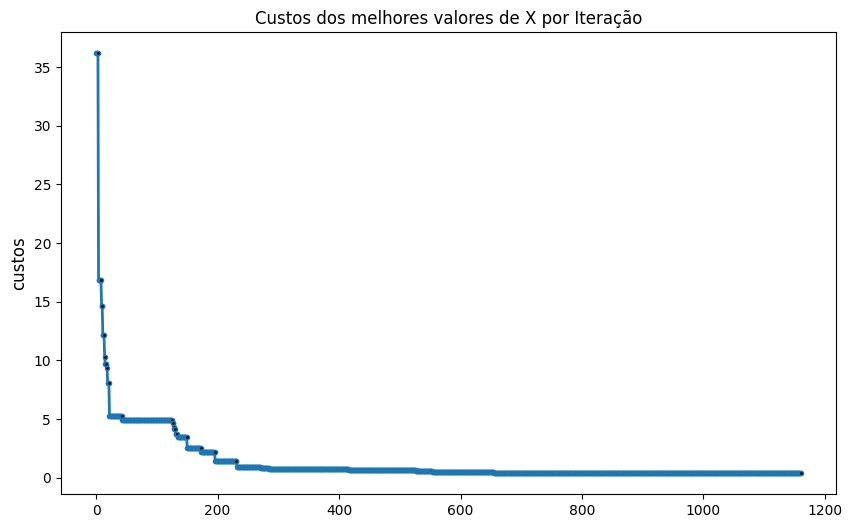

In [ ]:
plotar_funcao(custos)